In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [[[i + j] for i in range(5)] for j in range(100)]
X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [3]:
y = [(i+5) for i in range(100)]
y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

In [4]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [6]:
from keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,  # input -> layer1(그 안에 노드가 3개) 
                             input_shape=(5,1),  # activation을 넣지 않는 이유 - 기본적으로 tanh이 들어있어
                             return_sequences = False)) # 시퀀스마다 output을 내지 않겠다는
model_1.add(layers.Dense(1)) # 분류X  예측O!!!
model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.compile(loss='mse', # 예측문제니까
                optimizer='adam',metrics=['accuracy'])

In [8]:
Hist_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=8, #80개니까
                     validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 71ms/step - loss: 3749.5252 - accuracy: 0.0000e+00 - val_loss: 3917.2395 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 4044.3356 - accuracy: 0.0000e+00 - val_loss: 3912.7500 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3897.7218 - accuracy: 0.0000e+00 - val_loss: 3908.2954 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 3514.9815 - accuracy: 0.0000e+00 - val_loss: 3903.8599 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 4109.3818 - accuracy: 0.0000e+00 - val_loss: 3899.3511 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 3984.1571 - accuracy: 0.0000e+00 - val_loss: 3894.8860 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - lo

In [9]:
model_1.predict(X_test[0].reshape(1,5,1))

array([[4.5504]], dtype=float32)

In [ ]:
y_hat = model_1.predict(X_test)


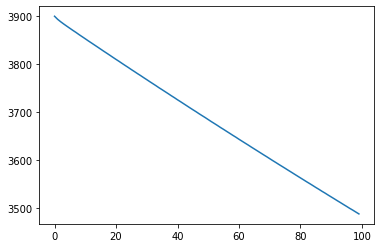

In [ ]:
plt.plot(Hist_1.history['loss'])
plt.show()

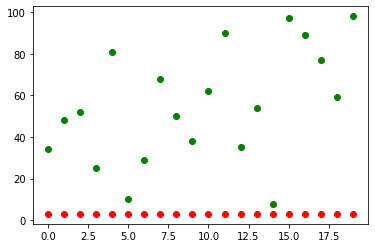

In [ ]:
plt.scatter(range(20), y_hat, c='r') # 104개 중 20개만 뽑아서 scatter
plt.scatter(range(20), y_test, c='g')
plt.show()

In [ ]:
# narmal 하면 하지 않은 것에 비해 속도가 빨라져. normal하지 않은 것도 오래 돌리면 되긴 한데, normal은 더 빨리 올라옴 

X = [[[(i+j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))   


In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [ ]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3, input_shape=(None, 1), return_sequences=False))
model_2.add(layers.Dense(1))
model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
Hist_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 0.4695 - accuracy: 0.0035 - val_loss: 0.4259 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3877 - accuracy: 0.0085 - val_loss: 0.3395 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.0107 - val_loss: 0.2774 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.0035 - val_loss: 0.2323 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.0085 - val_loss: 0.2014 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1679 - accuracy: 0.0344 - val_loss: 0.1777 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1613 - accuracy: 0.0136 - val_loss: 0.1583 - val_accur

In [ ]:
y_hat = model_2.predict(X_test)

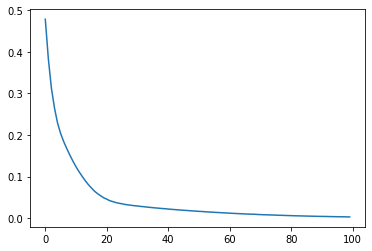

In [ ]:
plt.plot(Hist_2.history['loss'])
plt.show()

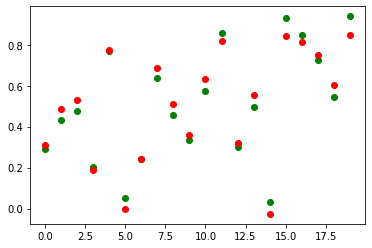

In [ ]:

plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

* Stacked으로 레이어를 여러겹 쌓을 때는 return sequence를 true로 내보내고, 사이즈를 output 사이즈만큼 맞춰줘야(3)

In [ ]:
X = [[[i+j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# 100개 X, (5행 1열) 1개만
X_test[0].reshape(1,5,1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

# return_sequences = False

In [ ]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1, # unit 하나만
                                 input_shape = (5,1),
                                 return_sequences = False))

Model_False.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습 시키지 않는 이유 =>  return sequences를 False로 했을 때 나오는 값의 형태가 궁금
Model_False.predict(X_test[0].reshape(1,5,1))
# 5개 넣었는데 1개만 도출. sequences를 돌면서 각각의 값을 도출하지 않겠다고 했기 때문에 마지막의 값만 도출

array([[-1.]], dtype=float32)

In [ ]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3, # unit 세개
                                 input_shape = (5,1),
                                 return_sequences = False))

Model_False.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model_False.predict(X_test[0].reshape(1,5,1))

# sequence당 5개 input에 5개 output이 아니라, 시퀀스당 마지막 1개 값만

array([[-0.9974264, -1.       , -1.       ]], dtype=float32)

# return_sequences = True

In [ ]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1, # unit 하나
                                 input_shape = (5,1),
                                 return_sequences = True))

Model_True.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model_True.predict(X_test[0].reshape(1,5,1))

# sequence당 5개 output

array([[[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]], dtype=float32)

In [ ]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3, # unit 세 개
                                 input_shape = (5,1),
                                 return_sequences = True))

Model_True.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model_True.predict(X_test[0].reshape(1,5,1))

# sequence 3개, output 5개

array([[[-0.6688029 , -1.        ,  1.        ],
        [-0.96022975, -1.        ,  1.        ],
        [-0.9545059 , -1.        ,  1.        ],
        [-0.95707995, -1.        ,  1.        ],
        [-0.9592926 , -1.        ,  1.        ]]], dtype=float32)

In [12]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3, # unit 세 개
                                 input_shape = (5,1),
                                 return_sequences = True))

Model_True.add(layers.SimpleRNN(3, # unit 세 개
                                input_shape = (5,3),
                                 return_sequences = True))

Model_True.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model_True.predict(X_test[0].reshape(1,5,1))

# sequence 3개, output 5개
# 노드 하나당 도출값1. input shape랑 상관없이. 그 다음 숫자를 예측하는 거니까

array([[[-0.93520725,  0.2265301 ,  0.7456759 ],
        [-0.9008246 , -0.5320377 ,  0.95000327],
        [-0.9757021 , -0.7017448 ,  0.934601  ],
        [-0.98287463, -0.70759666,  0.9414684 ],
        [-0.983066  , -0.7116926 ,  0.9421144 ]]], dtype=float32)